# Applied Machine Learning: Week 01
### Sean M. Shiverick


## Practical Assignment: Classification with Scikit-Learn

## Tasks to be explored in class
1. Verify your Docker environment is working properly  
* Run an experiment on the Iris dataset using the perceptron linear classifier using the **Sepal input features** and contrast the results with **Petal input features**. See [this section](#Task:-repeat-perceptron-modeling-task-on-sepal-features) for more details
* Do a Kaggle submission for the Titanic survival problem using your favourite ML classification algorithm.
  * Switch to the Labs-01.1-Titanic-on-Kaggle to perform this task using the `Titanic-EDA-Classifier-Kaggle-submit.ipynb` notebook. See slides from this Unit also for more details and suggested improvements.

# Classification for predicting class labels

## Task: Repeat Perceptron Modeling Task on Sepal Features 
Repeat perceptron modeling task on sepal features as opposed to petal features.

**Sub-TASKS** 
- Repeat this section using the first and second columns which correspond respectively to the sepal length, and the sepal width of the flower samples.

- Dont forget to plot the decison boundary for the sepal features

- Report the accuracy for raw input data and for the standardized data and compare results with the petal-based models

# Train Perceptron with scikit-learn:
### Introduction to basic terminology and notations
* Iris dataset extensively has 150 examples, with 4 inputs and 1 target variable. 

## Step 1.0 Import packages 

In [1]:
import sklearn
import mglearn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

## Step 1.1 Load Iris dataset from scikit-learn. 
The input variables (aka predictors) are labeled as follows:
*  The first column represents the sepal length, and the second column the sepal width of the flower samples. 
* The third column represents the petal length, and the fourth column the petal width of the flower samples.

The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

pd.DataFrame(iris.data).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Step 1.3 Extract Sepal length and Sepal width predictors
* Extract first column represents the sepal length,
* Second column is the sepal width of flower samples

In [3]:
X = iris.data[:, [0, 1]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [4]:
#summary stats
pd.DataFrame(iris.data).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
import pandas as pd
pd.DataFrame(iris.data).tail()

,0,1,2,3
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


## Step 2. Split data into Train and Test sets
* Splitting data into 70% training and 30% test data:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


## Step 3. Fit Perceptron Model using Training Data

In [8]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=1, shuffle=True,
      verbose=0, warm_start=False)

### * Note
* You can replace `Perceptron(n_iter, ...)` by `Perceptron(max_iter, ...)` in scikit-learn >= 0.19. 
* The `n_iter` parameter is used here deriberately, because some people still use scikit-learn 0.18.

In [9]:
y_pred = ppn.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 15


In [10]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.67


In [11]:
print('Accuracy: %.2f' % ppn.score(X_test, y_test))

Accuracy: 0.67


### One-third of Test data are misclassified. 
* Terrible performance on non-standardized input data. 
* Next, let's standardize the data and see what happens

## Step 4. Preprocessing: Scaling and Centering

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
#tmp analysis of ranges before and after standardizing the data
X_trainT, X_testT, y_trainT, y_testT = train_test_split(
    iris.data, y, test_size=0.3, random_state=1, stratify=y)
#summary stats
sc = StandardScaler()
sc.fit(X_trainT)
X_trainT_std = sc.transform(X_trainT)

print("Before std")
print(pd.DataFrame(X_trainT).describe())
print("After std")
print(pd.DataFrame(X_trainT_std).describe())

Before std
                0           1           2           3
count  105.000000  105.000000  105.000000  105.000000
mean     5.857143    3.069524    3.789524    1.196190
std      0.834342    0.431706    1.801598    0.767729
min      4.300000    2.000000    1.000000    0.100000
25%      5.200000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.300000    1.300000
75%      6.400000    3.400000    5.100000    1.800000
max      7.900000    4.200000    6.900000    2.500000
After std
                  0             1             2             3
count  1.050000e+02  1.050000e+02  1.050000e+02  1.050000e+02
mean   1.501444e-15 -4.705231e-17  5.709718e-17  1.987828e-16
std    1.004796e+00  1.004796e+00  1.004796e+00  1.004796e+00
min   -1.875264e+00 -2.489319e+00 -1.555787e+00 -1.434683e+00
25%   -7.913958e-01 -6.273171e-01 -1.221152e+00 -1.172925e+00
50%   -6.881702e-02 -1.618168e-01  2.847054e-01  1.358648e-01
75%    6.537617e-01  7.691839e-01  7.308854e-01  7.902596e-

## Step 5. Train Perceptron using Standardized Input Data

Let's standardize the data and see what happens.
<P>
Train a perceptron and plot the decision regions (in 2D using just two input variables using `plot_decision_region` (a function for plotting decision regions for the problem at hand (Iris Classification))

In [14]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=1, shuffle=True,
      verbose=0, warm_start=False)

**Note**
* You can replace `Perceptron(n_iter, ...)` by `Perceptron(max_iter, ...)` in scikit-learn >= 0.19. 
* The `n_iter` parameter is used here deriberately, because some people still use scikit-learn 0.18.

In [15]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 15


In [16]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.67


In [17]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.67


In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

Training a perceptron model using the standardized training data:

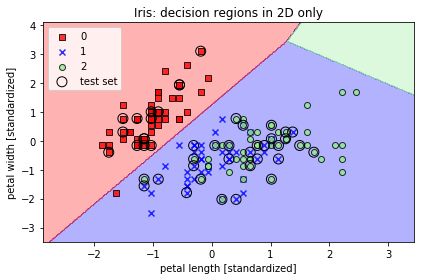

In [19]:
#append training and test input data
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.title('Iris: decision regions in 2D only')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

## Keep a log of your experiments

In [20]:
%time  #use time to time the execution time of a code cell

results = pd.DataFrame(columns=["ExpID", "Test Accuracy%", "Experiment description"])

results.loc[len(results)] = ["1", np.round(0.42 * 100, 1), "Perceptron with Petal features (Raw)"]
results.loc[len(results)] = ["2", np.round(0.90 * 100, 1), "Perceptron with Petal features (Std)"]
results.loc[len(results)] = ["3", np.round(0.67 * 100, 1), "Perceptron with Sepal features (Raw)"]
results.loc[len(results)] = ["4", np.round(0.67 * 100, 1), "Perceptron with Sepal features (Std)"]
results

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


,ExpID,Test Accuracy%,Experiment description
0,1,42.0,Perceptron with Petal features (Raw)
1,2,90.0,Perceptron with Petal features (Std)
2,3,67.0,Perceptron with Sepal features (Raw)
3,4,67.0,Perceptron with Sepal features (Std)
